<a href="https://colab.research.google.com/github/Alainm74/DataAnalystPortafolio/blob/main/Descriptive_Analytics_%2B_Probability_Models_%2B_Hypothesis_Test_R_Alain_Monroy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Statistics for Data Analytics


##Author

Ruben Alain Monroy Perez Negron







##Abstract

This analysis focuses on a real-world, relational dataset containing both categorical and continuous variables. The dataset, representing customer shopping data, is explored through various statistical techniques and visualizations.

In Section 1 - Descriptive Analytics, the dataset is described using appropriate plots, including total quantity of sales by category and total price by location. Central and variational measures for a continuous attribute (price) are computed, including mode, mean, median, range, interquartile range, variance, and standard deviation. Chebyshev's rule is applied to detect outliers in the price variable.

Section 2 - Probability models, involves selecting four variables and proposing probability models to quantify uncertainty. Parameters of each model are estimated, and the models are used for predictive analytics, providing predictions for each attribute.

Section 3 - Hypothesis Test addresses the independence of categorical variables using a binary decision-making strategy and includes hypothesis statements, statistic and critical values, and result interpretation. Goodness-of-fit tests and mean tests are applied to evaluate the appropriateness of probability sets and the mean for a categorical and continuous variable, respectively.

The analysis includes code snippets for each step, with detailed explanations and visualizations. The use of Chebyshev's rule is extended by considering both unscaled and scaled (standard score and MinMax) data for outlier detection in the price variable. The box-plot technique is employed to identify outliers and gain insights into shop trends.

The results highlight the richness of information extracted from the dataset, demonstrating a comprehensive understanding of statistical measures, predictive modeling, and outlier detection techniques. Recommendations for future considerations, such as data collection, alternative feature selection methods, and exploring diverse algorithms, are provided for further refinement of the analysis.

## Section 1 - Descriptive Analytics

###(a) Describe the dataset using appropriate plots/curves/charts.

In [ ]:
data = read.csv('/content/customer_shopping_data.csv')
print(head(data)) # 6 initial rows of the dataset

  invoice_no customer_id gender age category quantity   price payment_method
1    I138884     C241288 Female  28 Clothing        5 1500.40    Credit Card
2    I317333     C111565   Male  21    Shoes        3 1800.51     Debit Card
3    I127801     C266599   Male  20 Clothing        1  300.08           Cash
4    I173702     C988172 Female  66    Shoes        5 3000.85    Credit Card
5    I337046     C189076 Female  53    Books        4   60.60           Cash
6    I227836     C657758 Female  28 Clothing        5 1500.40    Credit Card
  invoice_date  shopping_mall
1     5/8/2022         Kanyon
2   12/12/2021 Forum Istanbul
3    9/11/2021      Metrocity
4   16/05/2021   Metropol AVM
5   24/10/2021         Kanyon
6   24/05/2022 Forum Istanbul


In [ ]:
print(tail(data)) # 6 final rows of the dataset


      invoice_no customer_id gender age        category quantity   price
99452    I675411     C513603   Male  50            Toys        5  179.20
99453    I219422     C441542 Female  45        Souvenir        5   58.65
99454    I325143     C569580   Male  27 Food & Beverage        2   10.46
99455    I824010     C103292   Male  63 Food & Beverage        2   10.46
99456    I702964     C800631   Male  56      Technology        4 4200.00
99457    I232867     C273973 Female  36        Souvenir        3   35.19
      payment_method invoice_date    shopping_mall
99452           Cash    9/10/2021     Metropol AVM
99453    Credit Card   21/09/2022           Kanyon
99454           Cash   22/09/2021   Forum Istanbul
99455     Debit Card   28/03/2021        Metrocity
99456           Cash   16/03/2021     Istinye Park
99457    Credit Card   15/10/2022 Mall of Istanbul


Total Quantity of sales by Category

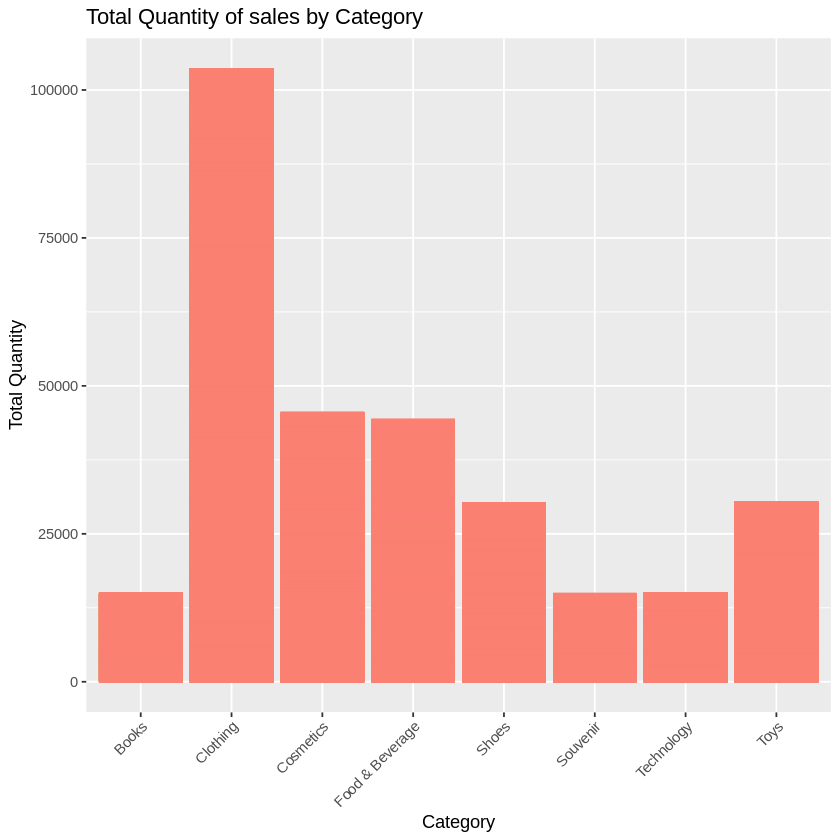

In [ ]:
library(ggplot2)

cat = data$cat
price =data$price
gen = data$gender
quan = data$quantity
shmall = data$shopping_mall
age = data$age
payment = data$payment_method


# Plotting using ggplot
ggplot(data, aes(x = cat, y = quan)) +
  geom_bar(stat = "identity",colour ="salmon") +
  labs(title = "Total Quantity of sales by Category", x = "Category", y = "Total Quantity") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

Total Price by Location

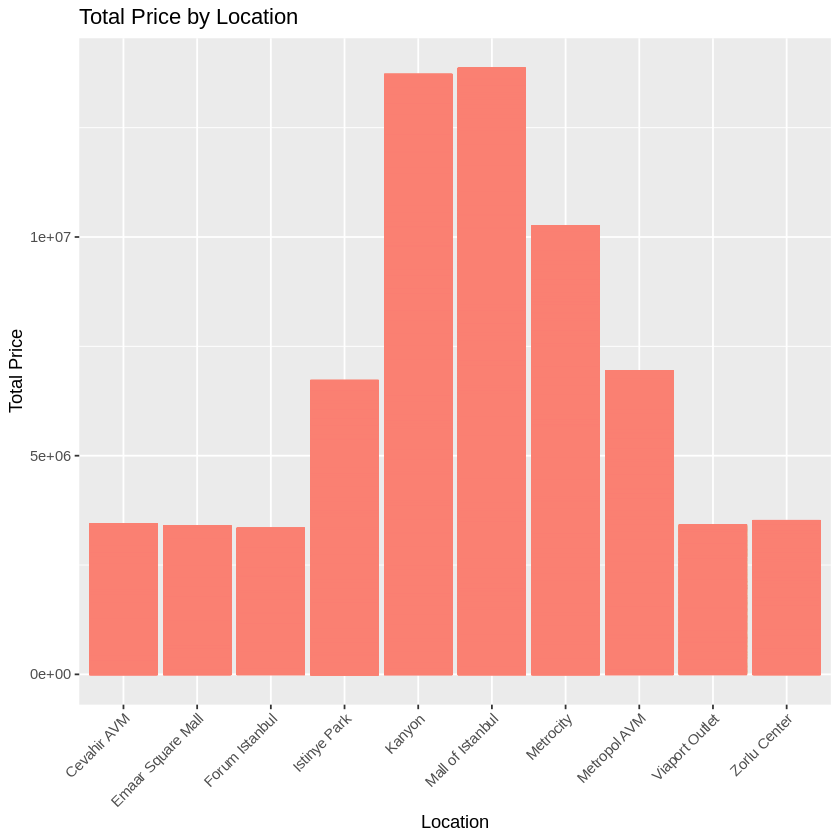

In [ ]:

# Plot using ggplot
ggplot(data, aes(x = shmall, y = price)) +
  geom_bar(stat = "identity",colour ="salmon") +
  labs(title = "Total Price by Location", x = "Location", y = "Total Price") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Slant x-axis labels

Categories by Gender

Pending review

Preferred shopping malls by Gender

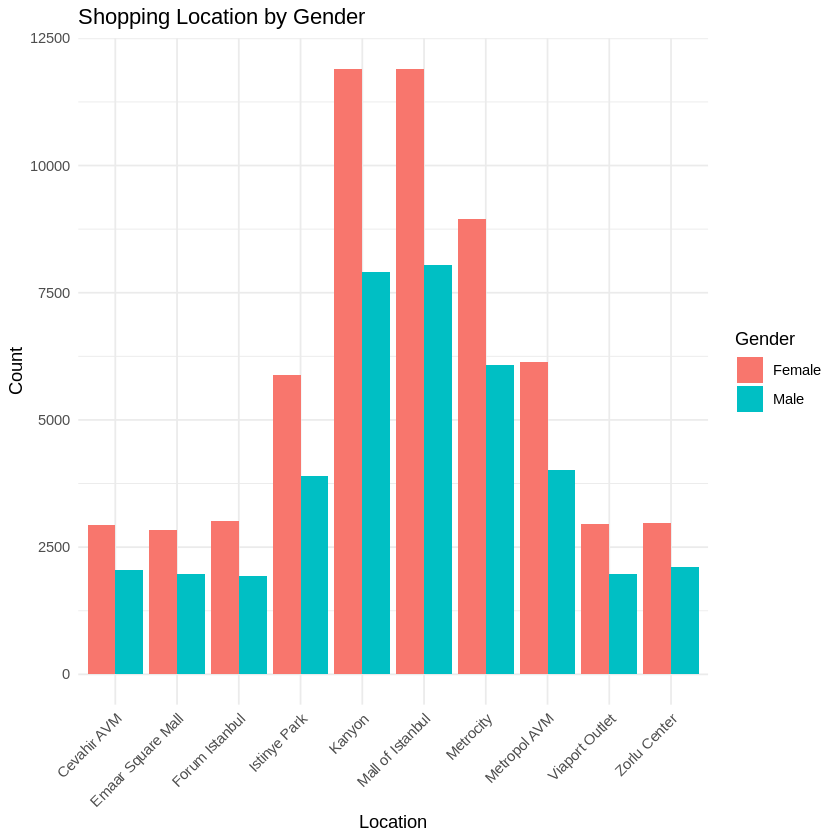

In [ ]:
library(ggplot2)

# Create a side-by-side bar chart

ggplot(data, aes(x = shmall, fill = gen)) +
  geom_bar(position = "dodge") +
  labs(title = "Shopping Location by Gender", x = "Location", y = "Count", fill = "Gender") +
  theme_minimal()+
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

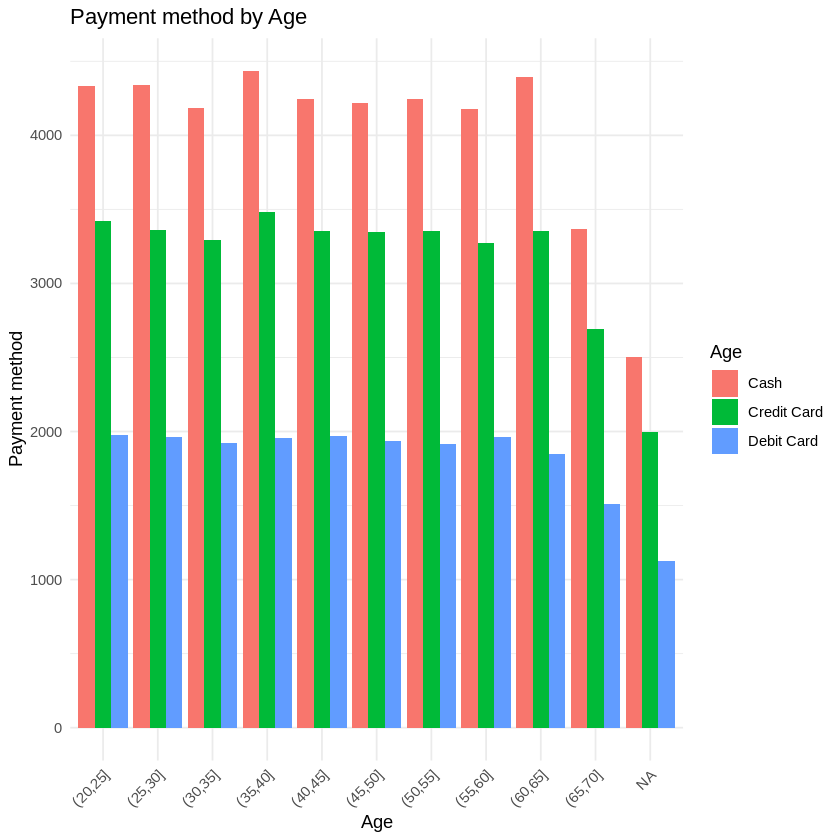

In [ ]:
# Create a side-by-side bar chart

data$age_group <- cut(data$age, breaks = c(20, 25, 30,35, 40,45, 50,55, 60,65,70))
ageg= data$age_group

ggplot(data, aes(x = ageg, fill = payment)) +
  geom_bar(position = "dodge") +
  labs(title = "Payment method by Age", x = "Age", y = "Payment method", fill = "Age") +
  theme_minimal()+
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

###(b) Consider one of continuous attributes, and compute central and variational measures.

####Central meassures


1.   Mode (Categorical variable Quantity selected for this)
2.   Mean
3.   Median




In [ ]:
#Considering attibute=price
X = data$price
Y = data$payment_method

#mode is a good central measure for a categorical variable
#Mode for quantity variable
t=table(Y) # frequency table
mode=names(t)[which(t==max(t))]  #mode can be computed for non-continuous variable
print( c('The mode for Payment Method is :', mode))


#Mean
mn = mean(X)
print(c('The mean for Price is:',round(mn,2)))

#Median
med = median(X)
print((c('The median for Price is',round(med,2))))

#Max
print(c("Maximum Price :",max(X)))

#Min
print(c("Minimum Price :",min(X)))


[1] "The mode for Payment Method is :" "Cash"                            
[1] "The mean for Price is:" "689.26"                
[1] "The median for Price is" "203.3"                  
[1] "Maximum Price :" "5250"           
[1] "Minimum Price :" "5.23"           


####Measures of Variability



1.   Range
2.   Interquartile Range
3.   Variance
4.   Standard Deviation



In [ ]:
#Considering attibute=price
X = data$price

#Range
range = max(X)-min(X)
print(c('The range for Price is:',round(range,2)))

#Interquartile Range
#Q3-Q1
iqr = IQR(X)
q = quantile(X)
print(c('The quartile for Price is:'))
print(q)
print(c('The interquartile range for Price (Q3-Q1) is:',round(iqr,2)))


#Variance
v = var(X)
print(c('The variance for Price is:',round(v,2)))

#Standard Deviation
std = sd(X)
print(c('The standdard deviation for Price is:',round(std,2)))



[1] "The range for Price is:" "5244.77"                
[1] "The quartile for Price is:"
     0%     25%     50%     75%    100% 
   5.23   45.45  203.30 1200.32 5250.00 
[1] "The interquartile range for Price (Q3-Q1) is:"
[2] "1154.87"                                      
[1] "The variance for Price is:" "885828.39"                 
[1] "The standdard deviation for Price is:"
[2] "941.18"                               


###(c) For a particular variable of the dataset, use Chebyshev's rule, and propose one-sigma interval. Based on your proposed interval, specify the outliers if any.

Considering Price as the variable under analysis, this variable does not have negative values, therefore, eventhough lower bound is negative, the outliers were detected as higher than upper bound. The same analysis was carried out with scaled data in order to identify potential outliers lower that lower bounds.

####Chebyshev's rule without scaled data

Loading required package: tidyverse

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


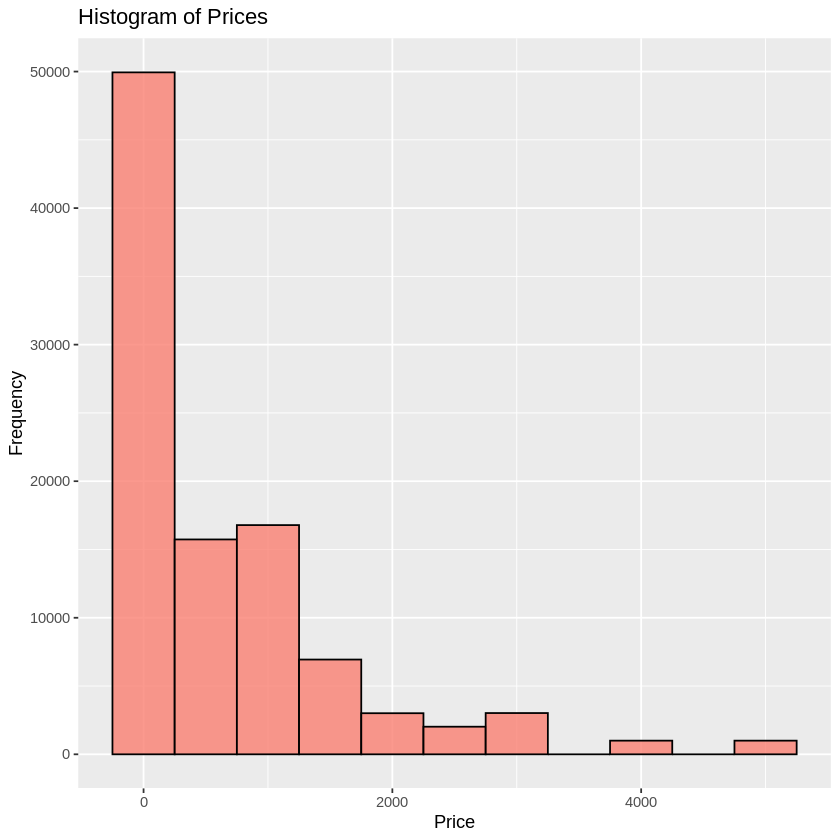

In [ ]:
#Import tidyverse package
require(tidyverse)
#Considering attibute=price
X = data$price


ggplot(data, aes(x = price)) +
  geom_histogram(binwidth = 500, fill = "salmon", color = "black", alpha = 0.8) +
  labs(title = "Histogram of Prices",
       x = "Price",
       y = "Frequency")

In [ ]:
#Chebyshev's rule
library(tidyverse)

#Considering attibute=price
X = data$price
mn = mean(X)
std = sd(X)

LowerBound1 = round(mn - std,2); UpperBound1 = round(mn + std,2)
LowerBound2 = round(mn - (2*std),2); UpperBound2 = round(mn + (2*std),2)
LowerBound3 = round(mn - (3*std),2); UpperBound3 = round(mn + (3*std),2)

header = c('Lower Bound', 'Upper Bound')
values1 = c(LowerBound1,UpperBound1)
values2 = c(LowerBound2,UpperBound2)
values3 = c(LowerBound3,UpperBound3)

print(min(X))
c('Chebyshevs rule one-sigma standard interval')
rbind(header,values1)
c('Chebyshevs rule two-sigma standard interval')
rbind(header,values2)
c('Chebyshevs rule three-sigma standard interval')
rbind(header,values3)

#find outliers

Out1=c() # empty array
for (j in X){
   if(j<LowerBound1|j>UpperBound1){o=j}else{o=NULL}
   Out1=c(Out1,o) # append o to the vector of Out
}

Out2=c() # empty array
for (j in X){
   if(j<LowerBound2|j>UpperBound2){o=j}else{o=NULL}
   Out2=c(Out2,o) # append o to the vector of Out
}

Out3=c() # empty array
for (j in X){
   if(j<LowerBound3|j>UpperBound3){o=j}else{o=NULL}
   Out3=c(Out3,o) # append o to the vector of Out
}


O3=length(Out3)/length(X)
print(length(Out3))
print(length(X))
print(c('The total % of data within Chebyshevs rule three-sigma standard interval is: ',1-O3))

o1 = length(Out1)
o2 = length(Out2)
o3 = length(Out3)
print(c(o1,o2,o3))

print(c('Outliers with Chebyshevs rule 3 sigma interval'))
print(Out3)

[1] 5.23


[1] "Chebyshevs rule one-sigma standard interval"

header,Lower Bound,Upper Bound
values1,-251.93,1630.44


[1] "Chebyshevs rule two-sigma standard interval"

header,Lower Bound,Upper Bound
values2,-1193.11,2571.63


[1] "Chebyshevs rule three-sigma standard interval"

header,Lower Bound,Upper Bound
values3,-2134.3,3512.81


[1] 2002
[1] 99457
[1] "The total % of data within Chebyshevs rule three-sigma standard interval is: "
[2] "0.97987069788954"                                                             
[1] 10056  5024  2002
[1] "Outliers with Chebyshevs rule 3 sigma interval"
   [1] 5250 4200 5250 5250 5250 4200 4200 5250 4200 5250 4200 4200 5250 4200
  [15] 4200 4200 5250 4200 5250 5250 5250 4200 5250 4200 4200 4200 4200 5250
  [29] 5250 5250 5250 5250 4200 4200 4200 5250 4200 4200 5250 5250 5250 5250
  [43] 4200 4200 5250 4200 5250 5250 5250 5250 4200 4200 4200 4200 5250 4200
  [57] 4200 5250 5250 4200 4200 4200 5250 5250 5250 4200 5250 5250 5250 5250
  [71] 5250 5250 4200 4200 5250 4200 5250 5250 4200 5250 4200 4200 4200 5250
  [85] 4200 5250 5250 5250 4200 4200 5250 4200 5250 5250 4200 5250 5250 5250
  [99] 5250 5250 4200 4200 4200 4200 4200 5250 4200 5250 5250 5250 4200 4200
 [113] 4200 5250 5250 5250 5250 4200 5250 5250 4200 5250 4200 5250 5250 5250
 [127] 4200 5250 5250 4200 4200 5250 5250 525

####Chebyshev's rule with scaled data (Standard Scale and MinMax)

In [ ]:
X = data$price
Z = (X - mean(X)) / sd(X)# Normalized Scaler
Y = (X - min(X)) / (max(X) - min(X)) # (0,1)-scalar / MinMax scaler
df1 = data.frame(X,Z,Y)
colnames(df1) = c('Price','normalized depth','mm scaler')
head(df1)

,Price,normalized depth,mm scaler
,<dbl>,<dbl>,<dbl>
1,1500.40,0.8618327,0.28507828
2,1800.51,1.1806969,0.34229909
3,300.08,-0.4134963,0.05621791
4,3000.85,2.4560472,0.57116327
5,60.60,-0.6679416,0.01055718
6,1500.40,0.8618327,0.28507828


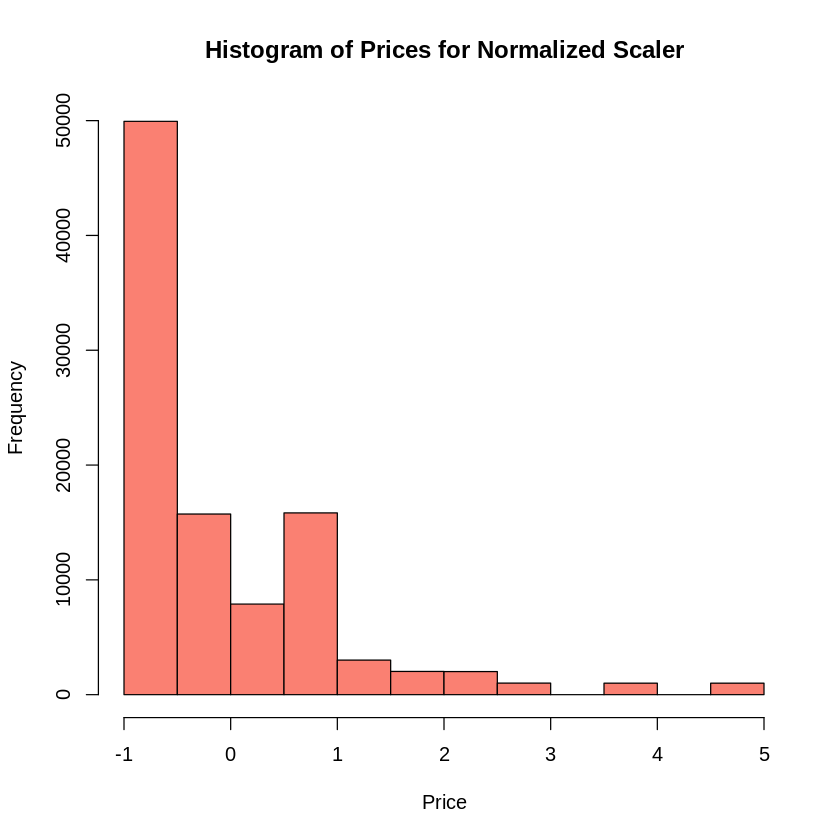

In [ ]:
#Normalized Scaler
hist(Z,col = "salmon",xlab = "Price",main = "Histogram of Prices for Normalized Scaler")



In [ ]:
X = data$price
Z = (X - mean(X)) / sd(X)# Normalized Scaler
mnZ = mean(Z)
stdZ = sd(Z)

LowerBound1 = round(mnZ - stdZ,2); UpperBound1 = round(mnZ + stdZ,2)
LowerBound2 = round(mnZ - (2*stdZ),2); UpperBound2 = round(mnZ + (2*stdZ),2)
LowerBound3 = round(mnZ - (3*stdZ),2); UpperBound3 = round(mnZ + (3*stdZ),2)

header = c('Lower Bound', 'Upper Bound')
values1 = c(LowerBound1,UpperBound1)
values2 = c(LowerBound2,UpperBound2)
values3 = c(LowerBound3,UpperBound3)

print(min(Z))
c('Chebyshevs rule one-sigma standard interval')
rbind(header,values1)
c('Chebyshevs rule two-sigma standard interval')
rbind(header,values2)
c('Chebyshevs rule three-sigma standard interval')
rbind(header,values3)

#find outliers

Out1=c() # empty array
for (j in Z){
   if(j<LowerBound1|j>UpperBound1){o=j}else{o=NULL}
   Out1=c(Out1,o) # append o to the vector of Out
}

Out2=c() # empty array
for (j in Z){
   if(j<LowerBound2|j>UpperBound2){o=j}else{o=NULL}
   Out2=c(Out2,o) # append o to the vector of Out
}

Out3=c() # empty array
for (j in Z){
   if(j<LowerBound3|j>UpperBound3){o=j}else{o=NULL}
   Out3=c(Out3,o) # append o to the vector of Out
}

#print(Out1)
#print(Out2)

O1=length(Out1)/length(Z)
O2=length(Out2)/length(Z)
O3=length(Out3)/length(Z)
print(length(Out3))
print(length(Z))
print(c('The total % of data within Chebyshevs rule one-sigma standard interval is: ',round(1-O1,4)))
print(c('The total % of data within Chebyshevs rule two-sigma standard interval is: ',round(1-O2,4)))
print(c('The total % of data within Chebyshevs rule three-sigma standard interval is: ',round(1-O3,4)))

#print(Out3)

[1] -0.7267717


[1] "Chebyshevs rule one-sigma standard interval"

header,Lower Bound,Upper Bound
values1,-1,1


[1] "Chebyshevs rule two-sigma standard interval"

header,Lower Bound,Upper Bound
values2,-2,2


[1] "Chebyshevs rule three-sigma standard interval"

header,Lower Bound,Upper Bound
values3,-3,3


[1] 2002
[1] 99457
[1] "The total % of data within Chebyshevs rule one-sigma standard interval is: "
[2] "0.8989"                                                                     
[1] "The total % of data within Chebyshevs rule two-sigma standard interval is: "
[2] "0.9495"                                                                     
[1] "The total % of data within Chebyshevs rule three-sigma standard interval is: "
[2] "0.9799"                                                                       


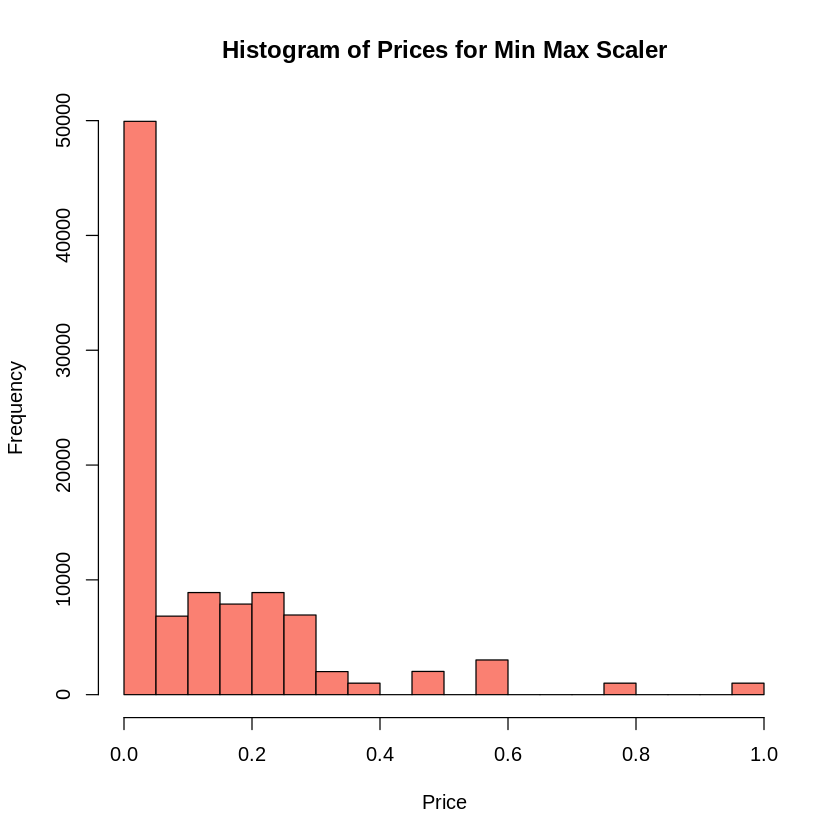

In [ ]:
#MinMax Scaler
hist(Y,col = "salmon",xlab = "Price",main = "Histogram of Prices for Min Max Scaler")

In [ ]:
X = data$price
Y = (X - min(X)) / (max(X) - min(X)) # (0,1)-scalar / MinMax scaler
mnY = mean(Y)
stdY = sd(Y)

LowerBound1 = round(mnY - stdY,2); UpperBound1 = round(mnY + stdY,2)
LowerBound2 = round(mnY - (2*stdY),2); UpperBound2 = round(mnY + (2*stdY),2)
LowerBound3 = round(mnY - (3*stdY),2); UpperBound3 = round(mnY + (3*stdY),2)

header = c('Lower Bound', 'Upper Bound')
values1 = c(LowerBound1,UpperBound1)
values2 = c(LowerBound2,UpperBound2)
values3 = c(LowerBound3,UpperBound3)

print(min(Y))
c('Chebyshevs rule one-sigma standard interval')
rbind(header,values1)
c('Chebyshevs rule two-sigma standard interval')
rbind(header,values2)
c('Chebyshevs rule three-sigma standard interval')
rbind(header,values3)

#find outliers

Out1=c() # empty array
for (j in Y){
   if(j<LowerBound1|j>UpperBound1){o=j}else{o=NULL}
   Out1=c(Out1,o) # append o to the vector of Out
}

Out2=c() # empty array
for (j in Y){
   if(j<LowerBound2|j>UpperBound2){o=j}else{o=NULL}
   Out2=c(Out2,o) # append o to the vector of Out
}

Out3=c() # empty array
for (j in Y){
   if(j<LowerBound3|j>UpperBound3){o=j}else{o=NULL}
   Out3=c(Out3,o) # append o to the vector of Out
}

#print(Out1)
#print(Out2)

O1=length(Out1)/length(Y)
O2=length(Out2)/length(Y)
O3=length(Out3)/length(Y)
print(length(Out1))
print(length(Out2))
print(length(Out3))
print(length(Z))
print(c('The total % of data within Chebyshevs rule one-sigma standard interval is: ',round(1-O1,4)))
print(c('The total % of data within Chebyshevs rule two-sigma standard interval is: ',round(1-O2,4)))
print(c('The total % of data within Chebyshevs rule three-sigma standard interval is: ',round(1-O3,4)))
#print(Out3)

[1] 0


[1] "Chebyshevs rule one-sigma standard interval"

header,Lower Bound,Upper Bound
values1,-0.05,0.31


[1] "Chebyshevs rule two-sigma standard interval"

header,Lower Bound,Upper Bound
values2,-0.23,0.49


[1] "Chebyshevs rule three-sigma standard interval"

header,Lower Bound,Upper Bound
values3,-0.41,0.67


[1] 10056
[1] 5024
[1] 2002
[1] 99457
[1] "The total % of data within Chebyshevs rule one-sigma standard interval is: "
[2] "0.8989"                                                                     
[1] "The total % of data within Chebyshevs rule two-sigma standard interval is: "
[2] "0.9495"                                                                     
[1] "The total % of data within Chebyshevs rule three-sigma standard interval is: "
[2] "0.9799"                                                                       


Considering the previous analysis, eventhough the use of data scalers as standard score (z-score) and MinMax Scaler , as the data for attribute "Price" is not normal distributed, the % of outliners detected by Chebyshev's rule do not correspond to the statistical points

###3(d) Explain how the box-plot technique can be used to detect outliers. Apply this technique for one attribute of the dataset

Box-Plot
Box plots, also known as box-and-whisker plots, are a useful technique for detecting outliers in a dataset related to shop trends.

Outliers are data points that significantly deviate from the majority of the data points and can indicate data entry errors, measurement errors, or genuinely unusual events. Box plots can help identifying these outliers by visually summarizing the distribution of the data.

Once identified the Outliers, they shoul be separately analyzed. Those confirmed as genuine unusual events may provide valuable insights into the shop trends, indicating unexpected, high-impact events such a human error in price labeling, season discount, change of season, etc

In [ ]:
#Calculate box-plot and graph outliers

#Considering attibute=price
X = data$price

#Finding Q1 and Q3 of Interquartile range
q = quantile(X); Q1 = q[2]; Q3 = q[4]
iqr = IQR(X)

#Lower and Upper bounds
UW = Q3 + 1.5 * iqr
LW = Q1 - 1.5 * iqr


outliers=c()
for (i in X){
    if (i<LW || i> UW){o=i}else{o=NULL}
    outliers=c(outliers,o)
}
#outliers

#Print results

header = c('Lower Bound', 'Upper Bound')
values = c(LW,UW)
rbind(header,values)


Outlier_count=length(outliers)/length(X)
print(c('The total of outliers with box-plot technique: ',length(outliers)))
print(length(X))
print(c('The total % of data within Chebyshevs rule three-sigma standard interval is: ',1-Outlier_count))

#print(outliers)



,25%,75%
header,Lower Bound,Upper Bound
values,-1686.855,2932.625


[1] "The total of outliers with box-plot technique: "
[2] "5024"                                           
[1] 99457
[1] "The total % of data within Chebyshevs rule three-sigma standard interval is: "
[2] "0.949485707391134"                                                            


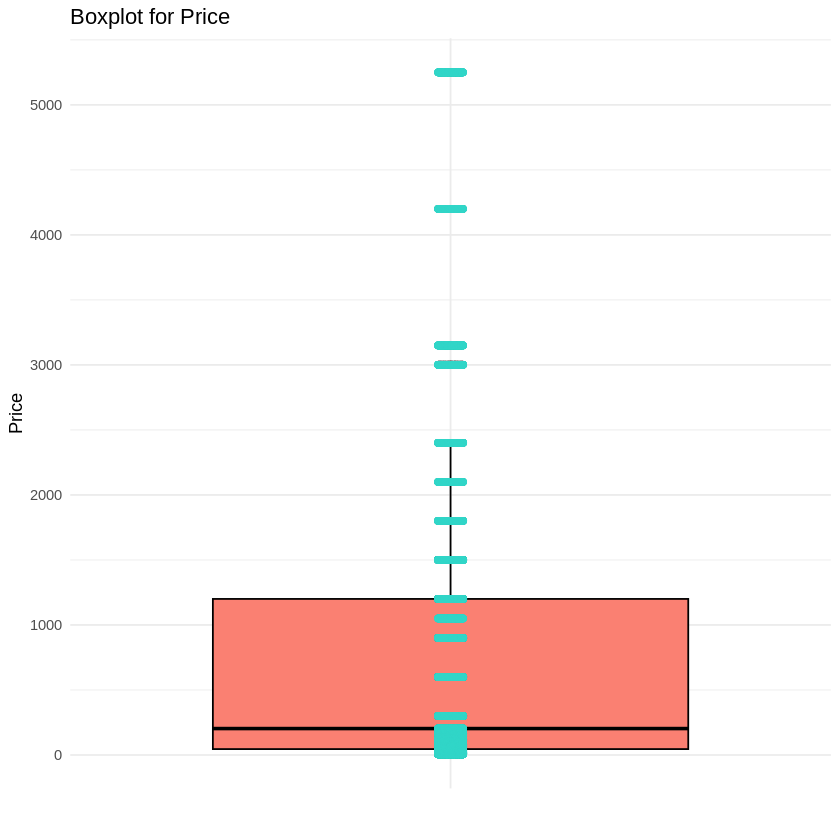

In [ ]:
#Boxplot
X = data$price



ggplot(data, aes(x = "", y = price)) +
  geom_boxplot(fill = "salmon", color = "black", outlier.color = "red") +
  geom_jitter(position = position_jitter(width = 0.02), color = "#30D5C8", alpha = 0.5) +
  labs(title = "Boxplot for Price",
       x = "",
       y = "Price") +
  theme_minimal()

## Section 2 - Probability models

###a) Select four variables of the dataset, and propose an appropriate probability model to quantify uncertainty of each variable.

Variables selected:
*   gender - Bernoulli
*   category - Multinomial
*   price - Normal/Exponential/Gamma
*   age - Normal/Exponential/Gamma


For continuous variables age and price, the comparison between Normal, Exponential and, Gamma models will be carried out in order to determine the  most suitable distribution for them.


###b) For each model in part (a), estimate the parameters of model.

####gender - Bernoulli

[1] "The parameters for variable 'gender' distributed as bernoulli are:"
Considering p = gender/max of values:  0.5980675 
X1
   Female      Male 
0.5980675 0.4019325 


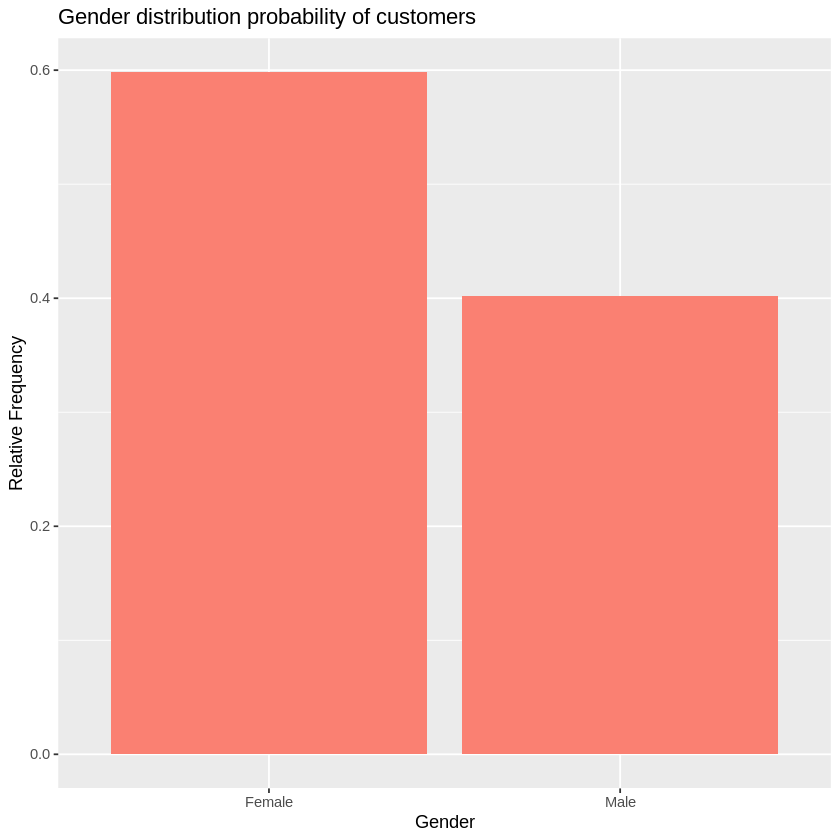

In [ ]:
#Parameter p
#p can be determined through number of appearences thus:


#calculating parameter
X1=data$gender

p1=table(X1)/length(X1)
print(c("The parameters for variable 'gender' distributed as bernoulli are:"))
cat("Considering p = gender/max of values: ",p1["Female"],"\n")

print(p1)

gender_data <- data.frame(Gender = names(p1), Relative_Frequency = as.numeric(p1))

ggplot(gender_data, aes(x = Gender, y = Relative_Frequency))  +
  geom_bar(stat = "identity", fill = "salmon") +
  labs(title = "Gender distribution probability of customers", x = "Gender", y = "Relative Frequency")

####category - Multinomial

X2
          Books        Clothing       Cosmetics Food & Beverage           Shoes 
     0.05008194      0.34675287      0.15179424      0.14856672      0.10088782 
       Souvenir      Technology            Toys 
     0.05026293      0.05023276      0.10142071 


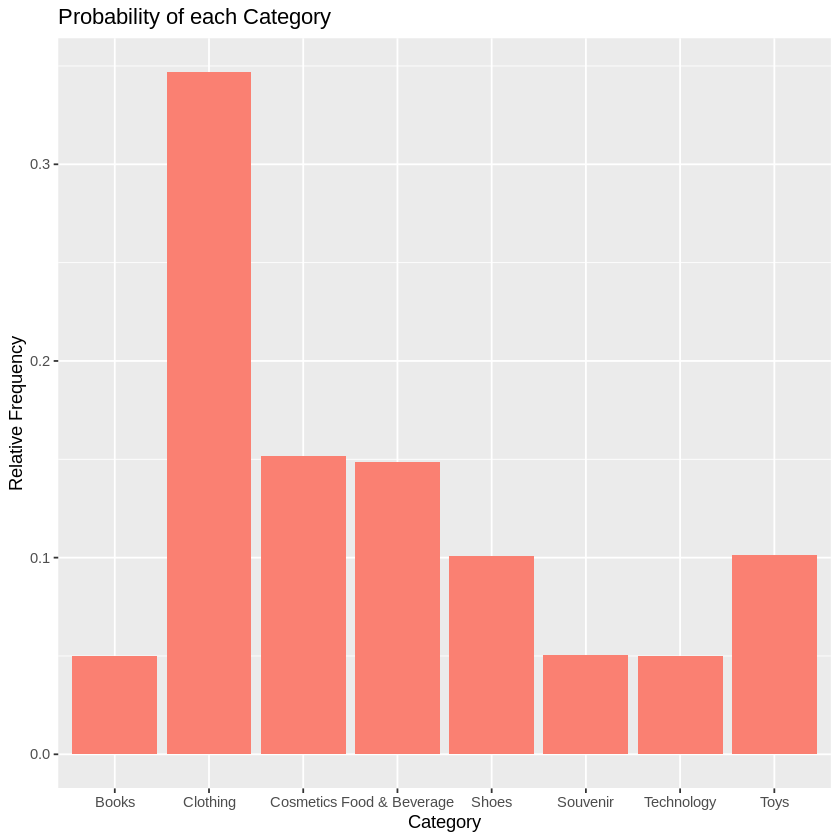

In [ ]:
#Parameters n and p
#Where n will be number of binary trials (input from experiment)
#p is the probability of ocurrance of each possible value

X2=data$category

p2=table(X2)/length(X2)
print(p2)

# Create a bar plot for the values in p

category_data <- data.frame(Cate = names(p2), Relative_Frequency = as.numeric(p2))

ggplot(category_data, aes(x = Cate, y = Relative_Frequency))  +
  geom_bar(stat = "identity", fill = "salmon") +
  labs(title = "Probability of each Category", x = "Category", y = "Relative Frequency")



####age - Normal/Exponential/Gamma

In [ ]:
#Considering Age as normal distribution
#Parameters mu and sigma

X4 = data$age

mu4 = mean(X4); sigma4 = sd(X4)

cat("Considering Age distributes as Normal:\n")
cat("Estimated mu Parameter:", mu4, "\n")
cat("Estimated std Parameter:", sigma4, "\n")


Considering Age distributes as Normal:
Estimated mu Parameter: 43.42709 
Estimated std Parameter: 14.99005 


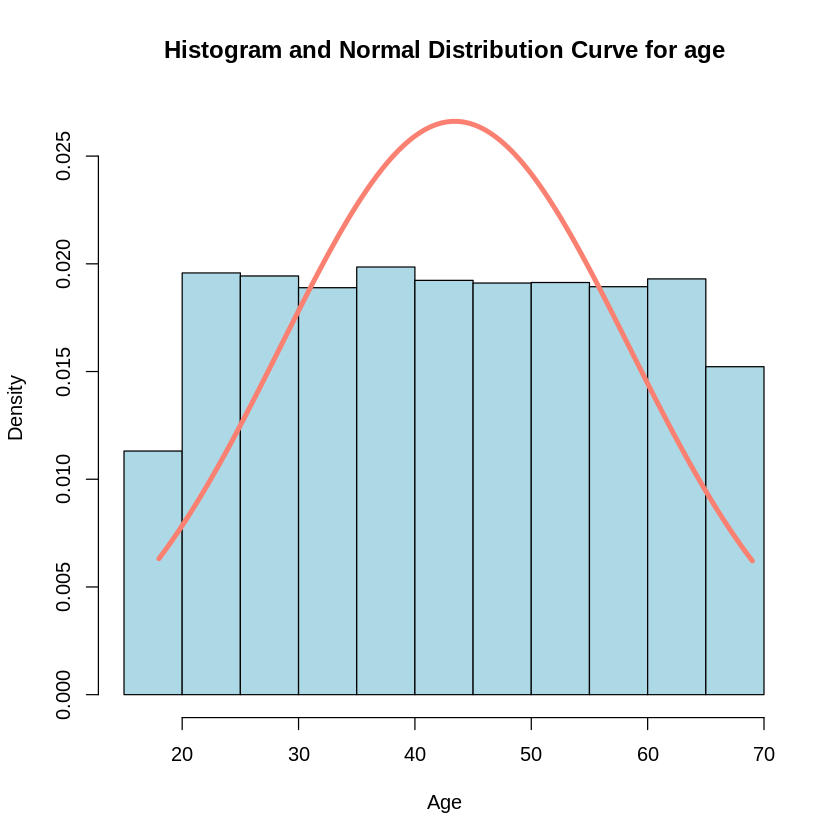

In [ ]:
#Compare Age vs a normal distribution with the estimated parameters

# Generate a sequence of values for the normal distribution curve
X4_values <- seq(min(X4), max(X4), length.out = length(X4))

# Plot the histogram of X4
hist(X4, freq = FALSE, main = "Histogram and Normal Distribution Curve for age",col = "lightblue", xlab = "Age",ylim=c(0, max(dnorm(X4_values, mean = mu4, sd = sigma4))))
# Add the normal distribution curve
lines(X4_values, dnorm(X4_values, mean = mu4, sd = sigma4), col = "salmon", lwd = 4)



In [ ]:
#Considering Age as exponential distribution
#Parameters mu and sigma

X4 = data$age

lambda4 = 1/mean(X4)

cat("Considering Age distributes as Exponential:\n")
cat("Estimated Lambda Parameter:", lambda4, "\n")


Considering Age distributes as Exponential:
Estimated Lambda Parameter: 0.0230271 


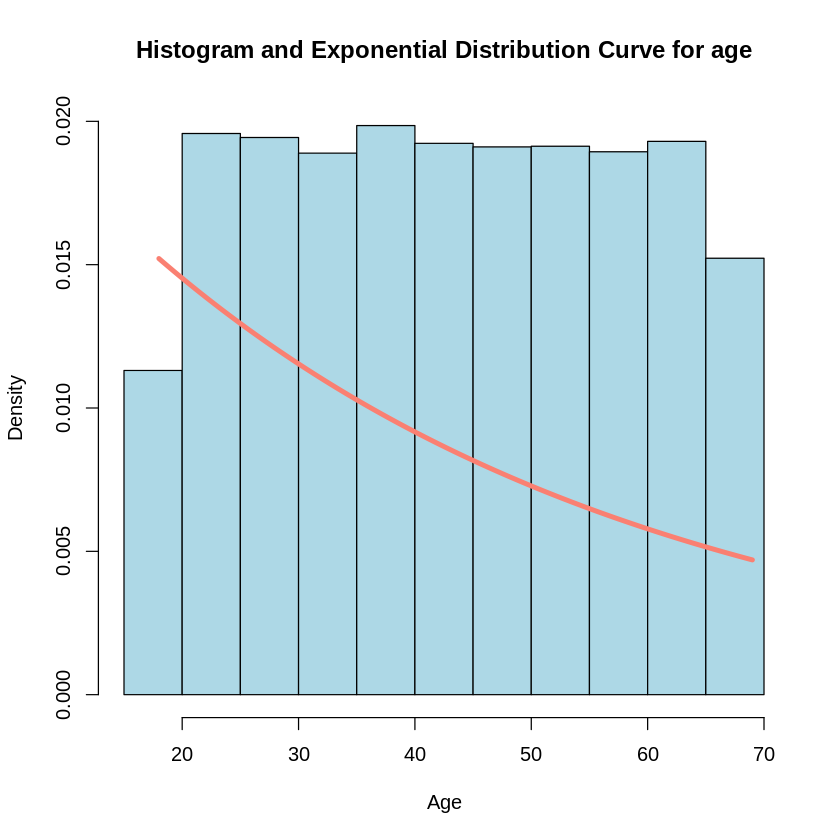

In [ ]:
#Compare Age vs an exponential distribution with the estimated parameters

# Generate a sequence of values for the normal distribution curve
X4_values <- seq(min(X4), max(X4), length.out = length(X4))

# Plot the histogram of X4
hist(X4, freq = FALSE, main = "Histogram and Exponential Distribution Curve for age",col = "lightblue",xlab = "Age", ylim=c(0, .020))
# Add the normal distribution curve
lines(X4_values, dexp(X4_values, lambda4), col = "salmon", lwd = 4)




In [ ]:
#Considering Age as gamma distribution
#Parameters mu and sigma

X4 = data$age

lambda4_1 = mean(X4)/var(X4)
alpha4 = mean(X4) * lambda4_1

cat("Considering Age distributes as Gamma:\n")
cat("Estimated Lambda Parameter:", lambda4_1, "\n")
cat("Estimated Alpha Parameter:", alpha4, "\n")

Considering Age distributes as Gamma:
Estimated Lambda Parameter: 0.1932655 
Estimated Alpha Parameter: 8.392958 


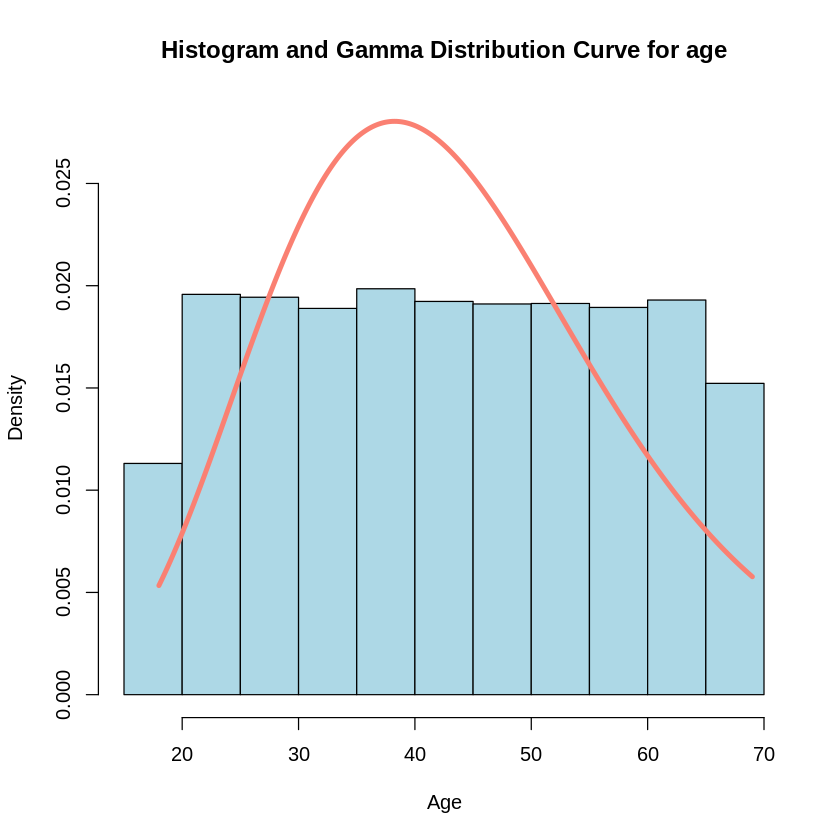

In [ ]:
#Compare Age vs gamma distribution with the estimated parameters

# Generate a sequence of values for the gamma distribution curve
X4_values <- seq(min(X4), max(X4), length.out = length(X4))

# Plot the histogram of X4
hist(X4, freq = FALSE, main = "Histogram and Gamma Distribution Curve for age",col = "lightblue",xlab = "Age", ylim=c(0, max(dgamma(X4_values,alpha4,lambda4_1))))
# Add the gamma distribution curve
lines(X4_values, dgamma(X4_values,alpha4,lambda4_1), col = "salmon", lwd = 4)




Considering the previous comparison, it can be concluded that Age is distributed as Gamma

####price - Normal/Exponential/Gamma

In [ ]:
#Considering price as normal distribution
#Parameters mu and sigma

X5 = data$price

mu5 = mean(X5); sigma5 = sd(X5)

cat("Considering Price distributes as Normal:\n")
cat("Estimated mu Parameter:", mu5, "\n")
cat("Estimated std Parameter:", sigma5, "\n")


Considering Price distributes as Normal:
Estimated mu Parameter: 689.2563 
Estimated std Parameter: 941.1846 


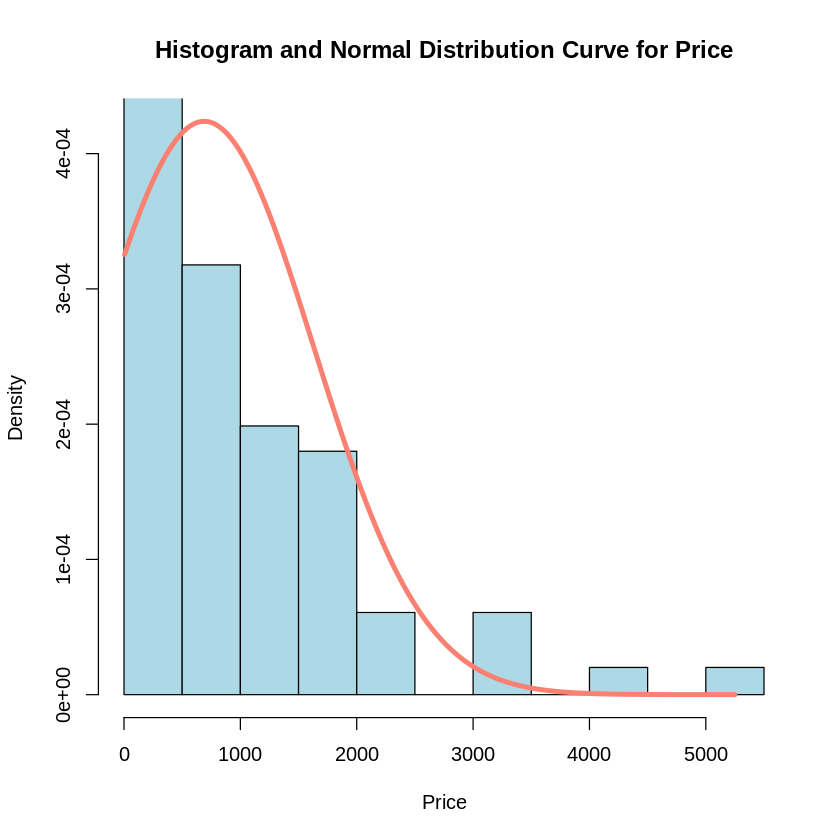

In [ ]:
#Compare price vs a normal distribution with the estimated parameters

# Generate a sequence of values for the normal distribution curve
X5_values <- seq(min(X5), max(X5), length.out = length(X5))

# Plot the histogram of X5
hist(X5, freq = FALSE, col = "lightblue" ,main = "Histogram and Normal Distribution Curve for Price",xlab = "Price", ylim=c(0, max(dnorm(X5_values, mean = mu5, sd = sigma5))))
# Add the normal distribution curve
lines(X5_values, dnorm(X5_values, mean = mu5, sd = sigma5), col = "salmon", lwd = 4)



In [ ]:
#Considering price as exponential distribution
#Parameters mu and sigma

X5 = data$price

lambda5 = 1/mean(X5)

cat("Considering Price distributes as Exponential:\n")
cat("Estimated Lambda Parameter:", lambda5, "\n")


Considering Price distributes as Exponential:
Estimated Lambda Parameter: 0.001450839 


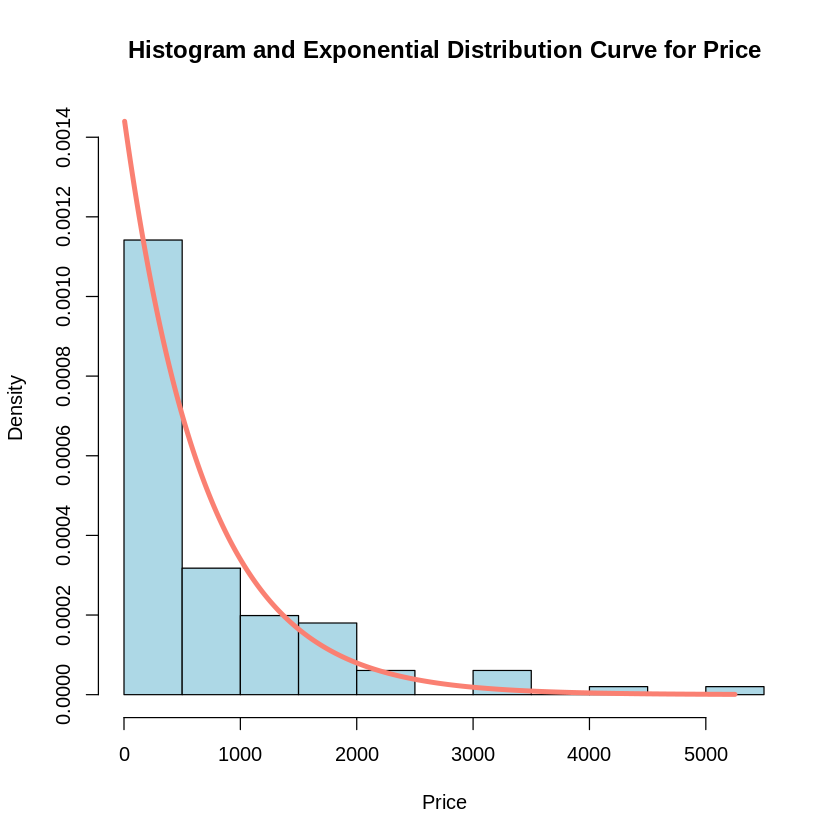

In [ ]:
#Compare price vs an exponential distribution with the estimated parameters

# Generate a sequence of values for the exponential distribution curve
X5_values <- seq(min(X5), max(X5), length.out = length(X5))

# Plot the histogram of X5
hist(X5, freq = FALSE, main = "Histogram and Exponential Distribution Curve for Price",col = "lightblue",xlab = "Price", ylim=c(0, max(dexp(X5_values, lambda5))))
# Add the exponential distribution curve
lines(X5_values, dexp(X5_values, lambda5), col = "salmon", lwd = 4)


In [ ]:
#Considering price as gamma distribution
#Parameters mu and sigma

X5 = data$price

lambda5_1 = mean(X5)/var(X5)
alpha5 = mean(X5) * lambda5_1

cat("Considering Price distributes as Gamma:\n")
cat("Estimated Lambda Parameter:", lambda5_1, "\n")
cat("Estimated Alpha Parameter:", alpha5, "\n")

Considering Price distributes as Gamma:
Estimated Lambda Parameter: 0.0007780924 
Estimated Alpha Parameter: 0.5363051 


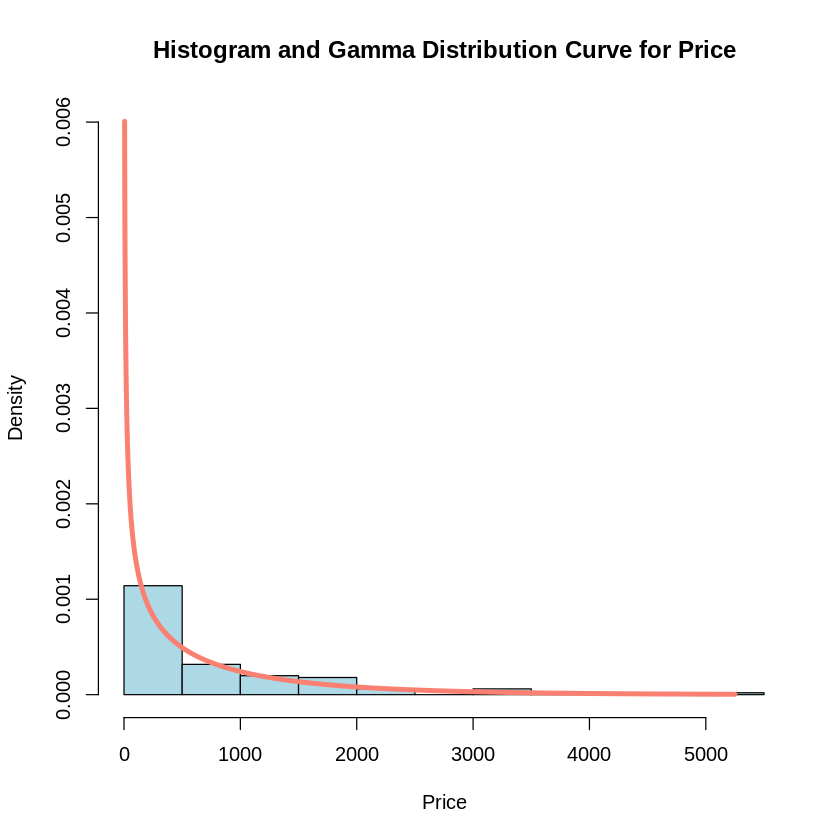

In [ ]:
#Compare price vs gamma distribution with the estimated parameters

# Generate a sequence of values for the normal distribution curve
X5_values <- seq(min(X5), max(X5), length.out = length(X5))

# Plot the histogram of X5
hist(X5, freq = FALSE, main = "Histogram and Gamma Distribution Curve for Price",col = "lightblue",xlab = "Price", ylim=c(0, max(dgamma(X5_values,alpha5,lambda5_1))))
# Add the normal distribution curve
lines(X5_values, dgamma(X5_values,alpha5,lambda5_1), col = "salmon", lwd = 4)


Considering the previous comparison, it can be concluded that price is distributed as Exponential

###c) Express the way in which each model can be used for the predictive analytics, then find the prediction for each attribute.

####gender - bernoulli

Considering that "gender" distributes as bernoulli, the historical probability of each gender can be computed, then the prediction could be related to:
1. Determine how many clients per gender there will be for the next year. This could have an impact on the stock volume.

In [ ]:
#Considering 10,000 clients in a period of time, estimated how many purchase by category

X1=data$gender

p1=table(X1)/length(X1)
print(p1)

n1 = 10000

expected_values = round(n1 * p1,0)

# Print the expected values in the desired format
for (gen in names(expected_values)) {
  cat("Gender", gen, ", expected clients", expected_values[gen], "\n")
}


X1
   Female      Male 
0.5980675 0.4019325 
Gender Female , expected clients 5981 
Gender Male , expected clients 4019 


####category - Multinomial

Considering that "category" distributes as Multinomial, the historical probability of each category can be computed, then the prediction could be related to:
1. Determine which category will get more demand for different seasons
2. Considering n clients in a period of time, estimated value of purchase by category
3. Use it for mantain stock

In [ ]:
#1 This example, the analyzis will provide which category has more demand during all year
X2=data$category


p2=table(X2)/length(X2)
print(p2)

mode2=names(p2)[which(p2==max(p2))]
pred2=mode2
pred2


X2
          Books        Clothing       Cosmetics Food & Beverage           Shoes 
     0.05008194      0.34675287      0.15179424      0.14856672      0.10088782 
       Souvenir      Technology            Toys 
     0.05026293      0.05023276      0.10142071 


[1] "Clothing"

In [ ]:
#Considering 10,000 clients in a period of time, estimated how many purchase by category
n2 = 10000

expected_values = round(n2 * p2,0)

# Print the expected values in the desired format
for (category in names(expected_values)) {
  cat("Category", category, ", expected sales", expected_values[category], "\n")
}


Category Books , expected sales 501 
Category Clothing , expected sales 3468 
Category Cosmetics , expected sales 1518 
Category Food & Beverage , expected sales 1486 
Category Shoes , expected sales 1009 
Category Souvenir , expected sales 503 
Category Technology , expected sales 502 
Category Toys , expected sales 1014 


####age - Gamma

Considering that "age" distributes as Gamma, a predictive analysis related to estimate the next year attraction of certain group of ages to shopping malls could be carried out:

In [ ]:
# Assuming a group of people at ages their 20s
j=20:29
new_data4 = data.frame(age = c(j))


# Predict the probabilities for each age group using the gamma distribution
predicted_probabilities4 = dgamma(new_data4$age, shape = alpha4, rate = lambda4_1)
cum_predicted_probabilities4 = pgamma(29, shape = alpha4, rate = lambda4_1)-pgamma(19, shape = alpha4, rate = lambda4_1)


# Display the predicted probabilities
cat("Predicted Probabilities:\n")
for (i in 1:length(new_data4$age)) {
  cat("Age", new_data4$age[i], ", client attraction estimated:", round(predicted_probabilities4[i]*100,2), "%\n")
}

#cat("Predicted Probability - attraction of Age group 20s:",round(sum(predicted_probabilities4)*100,2),"%\n")
cat("Predicted Probability - attraction of Age group 20s:",round(cum_predicted_probabilities4*100,2),"%\n")

Predicted Probabilities:
Age 20 , client attraction estimated: 0.79 %
Age 21 , client attraction estimated: 0.93 %
Age 22 , client attraction estimated: 1.09 %
Age 23 , client attraction estimated: 1.24 %
Age 24 , client attraction estimated: 1.4 %
Age 25 , client attraction estimated: 1.56 %
Age 26 , client attraction estimated: 1.72 %
Age 27 , client attraction estimated: 1.88 %
Age 28 , client attraction estimated: 2.03 %
Age 29 , client attraction estimated: 2.16 %
Predicted Probability - attraction of Age group 20s: 14.06 %


#### Price - Exponential
Considering that "price" distributes as Exponential, a predictive analysis related to a forecast on the increment of sales by a group of prices could be carried out:

In [ ]:
#Forecast of increment in sales for prices under 300 and over 1,500
predicted_prices51 = 1-pexp(1500, lambda5)
predicted_prices52 = pexp(300, lambda5)

# Display the predicted increase in sales
cat("Predicted increase of sales for products over 1,500 price (Luxury products):", round(predicted_prices51*100,2),"%\n")
cat("Predicted increase of sales for products under 300 price (Standard products):", round(predicted_prices52*100,2),"%\n")




Predicted increase of sales for products over 1,500 price (Luxury products): 11.35 %
Predicted increase of sales for products under 300 price (Standard products): 35.29 %


## Section 3 - Hypothesis test

###(a) Consider two categorical variables of the dataset, develop a binary decision making strategy to check whether two variables are independent at the significant level alpha=0.01. To do so,
  


In order to test whether two categorical variables are independent at given significant level a Chi-Square Test can be carried out following the steps:
1.  Step 1: State the hypotheses
H0: X1 and X2 are independent
H1:  X1 and X2 are dependent
2.  Find the statistic and critical values.

-  Calculate Expected Frequencies: Compute the expected frequencies under the assumption that the variables are independent.

-  Set significance level alpha

-  Calculate the test.value:

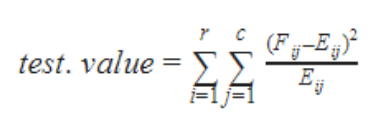

where:

F1, ..., Fk be the frequency for each class.

E1, ..., Ek be the expected value of the corresponding class.

-  Find the c.value from the chi-squared distribution table at the given significance level

c.value = qchisq(1 – alpha, (r – 1) * (c – 1))

3.  Specify the decision rule, explain your decision and Interpret results.

if test.value ≥ c.value therefore H0 is rejected



####(a.1) State the hypotheses.

Hypothesis Test: Test whether gender is independent of payment_method at the 5% level of significance

In [ ]:
X1=data$gender
X3=data$payment_method

#H0: X1 and X3 are independent
#H1:  X1 and X3 are dependent
alpha=0.01

####(a.2) Find the statistic and critical values.

In [ ]:
alpha=0.05
r = length(unique(X1))
c = length(unique(X3))


cat("Unique values for gender:", unique(X1),"\n")
cat("r = ",r,"\n")

cat("Unique values for payment_method:", unique(X3),"\n")
cat("c = ",c,"\n")


F = table(X1,X3)
print(F)
cat("\n")

E = matrix(NA,r,c);

for (i in 1:r){
  for (j in 1:c){
    E[i,j]=as.double(sum(F[i,]))*as.double(sum(F[,j]))/nrow(data)
  }
}

test.value=sum((F - E)^2 / E)
cat("test.value:", test.value,"\n")
c.value=qchisq(1-alpha, (r-1) * (c-1))
cat("c.value:", c.value,"\n")


Unique values for gender: Female Male 
r =  2 
Unique values for payment_method: Credit Card Debit Card Cash 
c =  3 
        X3
X1        Cash Credit Card Debit Card
  Female 26509       21011      11962
  Male   17938       13920       8117

test.value: 2.66502 
c.value: 5.991465 


####(a.3) Explain your decision and Interpret results.

In [ ]:
if (test.value >= c.value) {
  cat("Since test.value:", test.value, "is higher than or equal to c.value:", c.value, "H0: Test whether gender is independent of payment_method at the", alpha*100 ,"% level of significance is rejected\n")
} else {
  cat("Since test.value:", test.value, "is lower than c.value:", c.value, "H0: Test whether gender is independent of payment_method at the", alpha*100 ,"% level of significance is accepted\n")
}

Since test.value: 2.66502 is lower than c.value: 5.991465 H0: Test whether gender is independent of payment_method at the 5 % level of significance is accepted


Considering the Chi-square test, it is concluded that gender and payment_method are independent variables. Thus if an Analyst is developing a predictive model by applying machine learning techniques, the Analyst can select both gender and payment_method as variables due that are independent. Further feature selection techniques may apply and reject some of these variables.

###(b) Consider one categorical variable, apply goodness of fit test to evaluate whether a candidate set of probabilities can be appropriate to quantify the uncertainty of class frequency at the significant level alpha=0.05.

Variable under analysis - payment_method

European Central Bank ("ECB") indicates that in 2021, the preference of payment method for cash, debit card and credit card, were:
Cash - 24%
Debit  card - 17%
credit card - 16%
other paymen methods - 43%

Considering only cash, debit card and credit card as payment methods the weithed average of use would be:

Cash - 42%
Debit  card - 30%
credit card - 28%

**Test whether the ratio of payment methods in dataset follows the distribution of ECB considered by 5% level of significance.**

Source:
*  Bank, E.C., 2022. Use of cash by companies in the euro area. https://doi.org/10.2866/60233


X3
       Cash Credit Card  Debit Card 
  0.4468966   0.3512171   0.2018862 
Since pvalue: 0 is lower than alpha: 0.05 H0: Test whether the ratio of payment methods in dataset follows the distribution of ECB is rejected


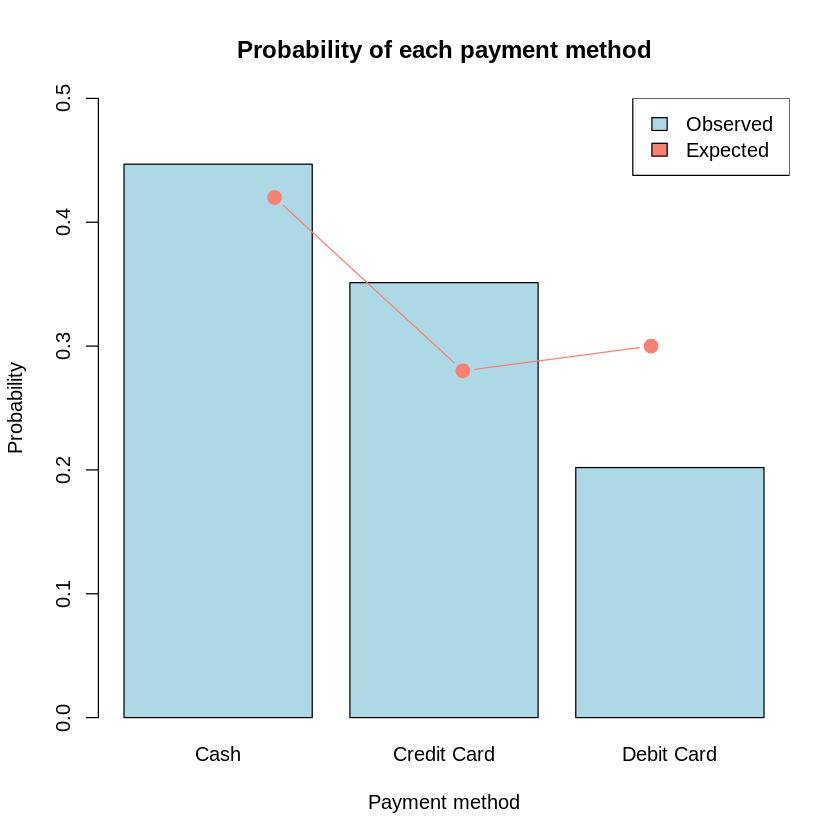

In [ ]:
X3=data$payment_method

#Calculating probabilities of payment method for dataset
p3=table(X3)/length(X3)
print(p3)

F =table(X3)

#H0: p1=0.42, p2=0.28, p3 = 0.30 ; H1: not H0
p0=c(0.42,0.28,0.30)
alpha = 0.05
test=chisq.test(F, p = p0)
pvalue=round(test$p.value,3)

if (pvalue < alpha) {
  cat("Since pvalue:", pvalue, "is lower than alpha:", alpha, "H0: Test whether the ratio of payment methods in dataset follows the distribution of ECB is rejected\n")
} else {
  cat("Since pvalue:", pvalue, "is higer than or equal to alpha:", alpha, "H0: Test whether the ratio of payment methods in dataset follows the distribution of ECB is accepted\n")
}


# Create a bar plot for the values in p
barplot(p3, names.arg = names(p3), main = "Probability of each payment method",col = "lightblue", xlab = "Payment method", ylab = "Probability", cex.names = 1, ylim = c(0, 0.5))
# Add a line bar with values from p0
points(p0, type='b', col = "salmon", pch = 19, cex = 1.5)
legend("topright", legend=c("Observed", "Expected"), fill=c("lightblue", "salmon"))

###(c) Consider one continuous variable in the dataset, and apply test of mean for a proposed candidate of μ at the significant level alpha=0.05.

In [ ]:
#Considering price
#Hypothesis Test, Corporate of shopping malls would like to know if the average ticket price is higher that 1,000
#Hypothesis Test using test value and c.value
#H0: mu>1000 , H1:mu<=5   lower one-sided test

Xht = data$price
mu0 = 1000
alphaht = 0.05
xbarht = mean(Xht) ; sht = sd(Xht); nht = length(Xht)  # sample info
test.value = (xbarht - mu0) / (sht / sqrt(nht))

c.value = qnorm(alphaht)
c(test.value,c.value)

if (test.value < c.value) {
  cat("Since test.value:", test.value, "is lower than c.value:", c.value, "H0: average ticket price is higher than 1,000 is rejected\n")
} else if (test.value == c.value) {  # Fix: Changed else to else if
  cat("Since test.value:", test.value, "is equal to c.value:", c.value, "H0: average ticket price is higher than 1,000 is rejected\n")
} else {
  cat("Since test.value:", test.value, "is greater than c.value:", c.value, "H0: average ticket price is higher than 1,000 is accepted\n")
}


# since test.value < c.value therefore we reject H0

[1] -104.122643   -1.644854

Since test.value: -104.1226 is lower than c.value: -1.644854 H0: average ticket price is higher than 1,000 is rejected
